In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# reading csv files
data =  pd.read_csv('car.data', sep=",",header=None)
print(data)

          0      1      2     3      4     5      6
0     vhigh  vhigh      2     2  small   low  unacc
1     vhigh  vhigh      2     2  small   med  unacc
2     vhigh  vhigh      2     2  small  high  unacc
3     vhigh  vhigh      2     2    med   low  unacc
4     vhigh  vhigh      2     2    med   med  unacc
...     ...    ...    ...   ...    ...   ...    ...
1723    low    low  5more  more    med   med   good
1724    low    low  5more  more    med  high  vgood
1725    low    low  5more  more    big   low  unacc
1726    low    low  5more  more    big   med   good
1727    low    low  5more  more    big  high  vgood

[1728 rows x 7 columns]


In [4]:
# Changing column names for better understanding
col_names = ['buying','maint','doors','persons','lug_boot','safety','class']
data.columns = col_names

In [5]:
data

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data.head() 

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [9]:
X=data[data.columns[:-1]]
y=data['class']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1209, 6)
(519, 6)
(1209,)
(519,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [14]:
clf = LogisticRegression(random_state = 0)
clf.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = clf.predict(X_test)
f1_LR=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred)) 

Testing Accuracy:  0.6801541425818882
[[  9   0  96  10]
 [  2   0  19   0]
 [ 24   0 339   0]
 [  6   0   9   5]]
              precision    recall  f1-score   support

           0       0.22      0.08      0.12       115
           1       0.00      0.00      0.00        21
           2       0.73      0.93      0.82       363
           3       0.33      0.25      0.29        20

    accuracy                           0.68       519
   macro avg       0.32      0.32      0.31       519
weighted avg       0.57      0.68      0.61       519



C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
#Using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = clf.predict(X_test)
f1_KNN=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.9132947976878613
[[ 91   0  24   0]
 [ 10  11   0   0]
 [  4   0 359   0]
 [  5   1   1  13]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       115
           1       0.92      0.52      0.67        21
           2       0.93      0.99      0.96       363
           3       1.00      0.65      0.79        20

    accuracy                           0.91       519
   macro avg       0.92      0.74      0.81       519
weighted avg       0.91      0.91      0.91       519



In [18]:
#Using Linear SVC
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', random_state = 0)
clf.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [19]:
y_pred = clf.predict(X_test)
f1_SVC_Linear=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.7244701348747592
[[ 19   0  96   0]
 [  0   0  21   0]
 [  6   0 357   0]
 [ 15   0   5   0]]
              precision    recall  f1-score   support

           0       0.47      0.17      0.25       115
           1       0.00      0.00      0.00        21
           2       0.75      0.98      0.85       363
           3       0.00      0.00      0.00        20

    accuracy                           0.72       519
   macro avg       0.31      0.29      0.27       519
weighted avg       0.63      0.72      0.65       519



C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
#Using rbf SVC
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', random_state = 0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [21]:
y_pred = clf.predict(X_test)
f1_SVC_rbf=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.8998073217726397
[[ 92   0  22   1]
 [ 14   6   0   1]
 [ 10   0 353   0]
 [  4   0   0  16]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       115
           1       1.00      0.29      0.44        21
           2       0.94      0.97      0.96       363
           3       0.89      0.80      0.84        20

    accuracy                           0.90       519
   macro avg       0.90      0.71      0.76       519
weighted avg       0.90      0.90      0.89       519



In [22]:
#Using NB classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = clf.predict(X_test)

print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.6146435452793835
[[ 10   0  45  60]
 [  5   0   8   8]
 [  7   0 289  67]
 [  0   0   0  20]]
              precision    recall  f1-score   support

           0       0.45      0.09      0.15       115
           1       0.00      0.00      0.00        21
           2       0.85      0.80      0.82       363
           3       0.13      1.00      0.23        20

    accuracy                           0.61       519
   macro avg       0.36      0.47      0.30       519
weighted avg       0.70      0.61      0.61       519



C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jagan\anaconda4\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#Trying decision tree classifier
from sklearn.tree import DecisionTreeClassifier
cls = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cls.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [25]:
y_pred = cls.predict(X_test)
f1_DT=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", cls.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.9749518304431599
[[112   2   1   0]
 [  0  21   0   0]
 [  7   0 356   0]
 [  2   1   0  17]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       115
           1       0.88      1.00      0.93        21
           2       1.00      0.98      0.99       363
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.95      0.95      0.95       519
weighted avg       0.98      0.97      0.98       519



In [26]:
#Trying Random forest classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth= 10 , max_features= 6)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=6,
                       n_estimators=50)

In [27]:
y_pred = clf.predict(X_test)
f1_RF=f1_score(y_test,y_pred, average='macro')

print("Testing Accuracy: ", clf.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.9749518304431599
[[111   2   2   0]
 [  0  21   0   0]
 [  6   0 357   0]
 [  0   3   0  17]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       115
           1       0.81      1.00      0.89        21
           2       0.99      0.98      0.99       363
           3       1.00      0.85      0.92        20

    accuracy                           0.97       519
   macro avg       0.94      0.95      0.94       519
weighted avg       0.98      0.97      0.98       519



In [28]:
dict(zip(X_train,clf.feature_importances_))

{'buying': 0.1773797678953715,
 'maint': 0.19755866361405097,
 'doors': 0.05787004049600102,
 'persons': 0.2046520768600575,
 'lug_boot': 0.1050645515288545,
 'safety': 0.2574748996056646}

[Text(363.49013671875, 629.0228571428572, 'persons <= 0.5\nentropy = 1.204\nsamples = 1209\nvalue = [269, 48, 847, 45]'),
 Text(353.02763671875, 582.4285714285714, 'entropy = 0.0\nsamples = 404\nvalue = [0, 0, 404, 0]'),
 Text(373.95263671875, 582.4285714285714, 'safety <= 0.5\nentropy = 1.478\nsamples = 805\nvalue = [269, 48, 443, 45]'),
 Text(199.44140625, 535.8342857142858, 'buying <= 2.5\nentropy = 1.691\nsamples = 271\nvalue = [144, 22, 60, 45]'),
 Text(105.9328125, 489.24, 'buying <= 0.5\nentropy = 1.688\nsamples = 208\nvalue = [113, 22, 28, 45]'),
 Text(41.85, 442.64571428571435, 'maint <= 2.5\nentropy = 0.847\nsamples = 73\nvalue = [53, 0, 20, 0]'),
 Text(31.387500000000003, 396.0514285714286, 'doors <= 0.5\nentropy = 0.301\nsamples = 56\nvalue = [53, 0, 3, 0]'),
 Text(20.925, 349.4571428571429, 'lug_boot <= 1.5\nentropy = 0.65\nsamples = 18\nvalue = [15, 0, 3, 0]'),
 Text(10.4625, 302.86285714285714, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0, 0, 0]'),
 Text(31.3875000000000

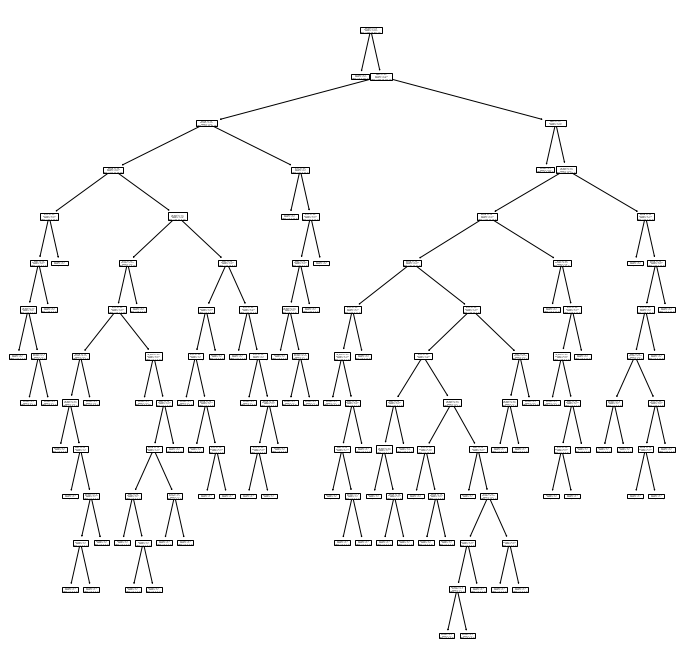

In [29]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12)) 
fn= ['buying','maint','doors','persons','lug_boot','safety']


tree.plot_tree(cls,feature_names = fn)

In [30]:
# import graphviz 
# dot_data = tree.export_graphviz(cls, out_file=None, 
#                               feature_names=X_train.columns,  
#                               class_names=y_train,  
#                               filled=True, rounded=True,  
#                               special_characters=True)

# graph = graphviz.Source(dot_data) 

# graph 

In [32]:
import xgboost as xgb

In [33]:
clf = xgb.XGBClassifier(max_depth=2, n_jobs = 4)

In [34]:
clf_xgb = xgb.XGBClassifier( max_depth=4, random_state = 42, n_jobs = 4)


In [35]:
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=4,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [36]:
print('Training set score: {:.4f}'.format(clf_xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_xgb.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9865


In [37]:
y_pred = clf_xgb.predict(X_test)

print("Testing Accuracy: ",clf_xgb.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.9865125240847784
[[114   0   1   0]
 [  0  21   0   0]
 [  5   0 358   0]
 [  0   1   0  19]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       115
           1       0.95      1.00      0.98        21
           2       1.00      0.99      0.99       363
           3       1.00      0.95      0.97        20

    accuracy                           0.99       519
   macro avg       0.98      0.98      0.98       519
weighted avg       0.99      0.99      0.99       519



In [38]:
from sklearn.neural_network import MLPClassifier

In [39]:
classifier = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

In [40]:
classifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=1)

In [41]:
y_pred = classifier.predict(X_test)

print("Testing Accuracy: ",classifier.score(X_test, y_test))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))

Testing Accuracy:  0.9788053949903661
[[110   0   5   0]
 [  0  21   0   0]
 [  5   0 358   0]
 [  1   0   0  19]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       115
           1       1.00      1.00      1.00        21
           2       0.99      0.99      0.99       363
           3       1.00      0.95      0.97        20

    accuracy                           0.98       519
   macro avg       0.98      0.97      0.98       519
weighted avg       0.98      0.98      0.98       519



Text(69.0, 0.5, 'Truth')

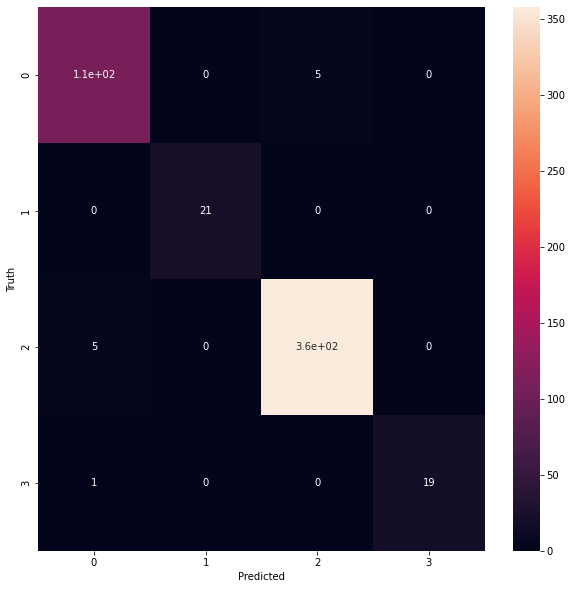

In [42]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')